In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn


In [2]:
df=pd.read_csv('dataset\All Electronics.csv')

In [3]:
df.shape

(9600, 9)

In [4]:
df.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings            95
no_of_ratings      95
discount_price    484
actual_price       70
dtype: int64

In [5]:
# df['']
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            9026 non-null   object
 1   main_category   9026 non-null   object
 2   sub_category    9026 non-null   object
 3   image           9026 non-null   object
 4   link            9026 non-null   object
 5   ratings         9026 non-null   object
 6   no_of_ratings   9026 non-null   object
 7   discount_price  9026 non-null   object
 8   actual_price    9026 non-null   object
dtypes: object(9)
memory usage: 705.2+ KB


In [8]:
# import numpy as np 
# import pandas as pd
# import os
# for dirname, _, filenames in os.walk(r'F:\ftgyhuij\E-Commerce-Product-Recommendations\dataset\All Electronics.csv'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [9]:
import pandas as pd
import numpy as np
import re
import sys
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
FILE_PATH = "dataset/All Electronics.csv"
prod_df = pd.read_csv(FILE_PATH)

print("Initial dataset shape:", prod_df.shape)

Initial dataset shape: (9600, 9)


In [11]:
df['ratings_cleaned'] = (
    df['ratings']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  
    .replace('', np.nan)                    
    .astype(float)                          
)

df['no_of_ratings_cleaned'] = (
    df['no_of_ratings']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)  
    .replace('', np.nan)
    .astype(float)
)

df['discount_price_cleaned'] = (
    df['discount_price']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

df['actual_price_cleaned'] = (
    df['actual_price']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

# df[['ratings_cleaned','no_of_ratings_cleaned','discount_price_cleaned','actual_price_cleaned']].describe()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    9026 non-null   object 
 1   main_category           9026 non-null   object 
 2   sub_category            9026 non-null   object 
 3   image                   9026 non-null   object 
 4   link                    9026 non-null   object 
 5   ratings                 9026 non-null   object 
 6   no_of_ratings           9026 non-null   object 
 7   discount_price          9026 non-null   object 
 8   actual_price            9026 non-null   object 
 9   ratings_cleaned         9002 non-null   float64
 10  no_of_ratings_cleaned   9002 non-null   float64
 11  discount_price_cleaned  9026 non-null   float64
 12  actual_price_cleaned    9026 non-null   float64
dtypes: float64(4), object(9)
memory usage: 987.2+ KB


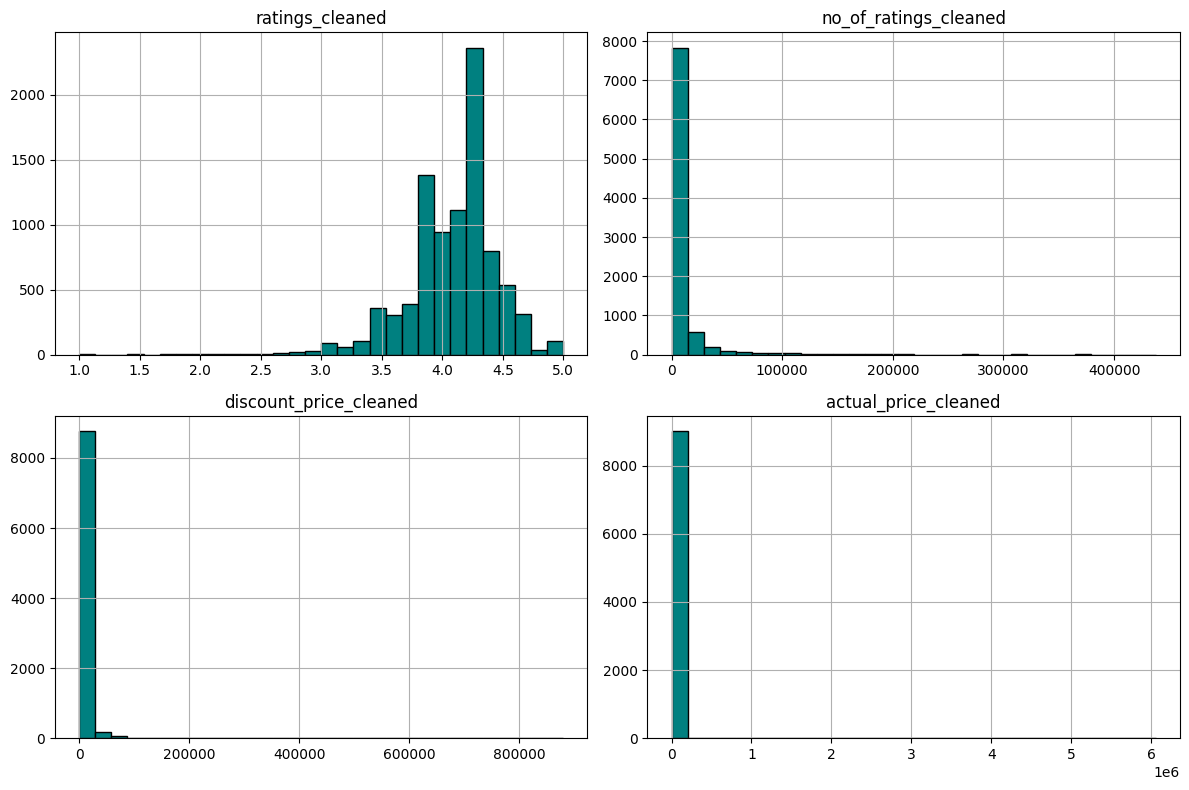

In [13]:
numeric_cols = ['ratings_cleaned','no_of_ratings_cleaned','discount_price_cleaned','actual_price_cleaned']
df[numeric_cols].hist(bins=30, figsize=(12,8), color='teal', edgecolor='black')
plt.tight_layout()
plt.show()

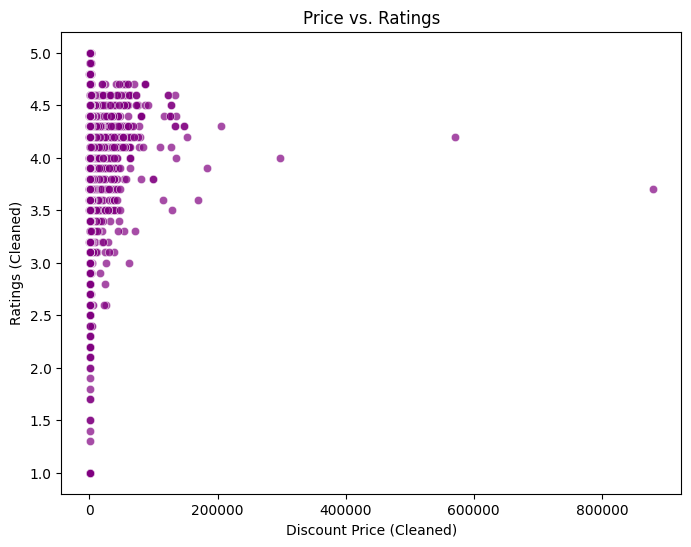

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['discount_price_cleaned'], 
    y=df['ratings_cleaned'], 
    alpha=0.7, 
    color='purple'
)
plt.xlabel("Discount Price (Cleaned)")
plt.ylabel("Ratings (Cleaned)")
plt.title("Price vs. Ratings")
plt.show()

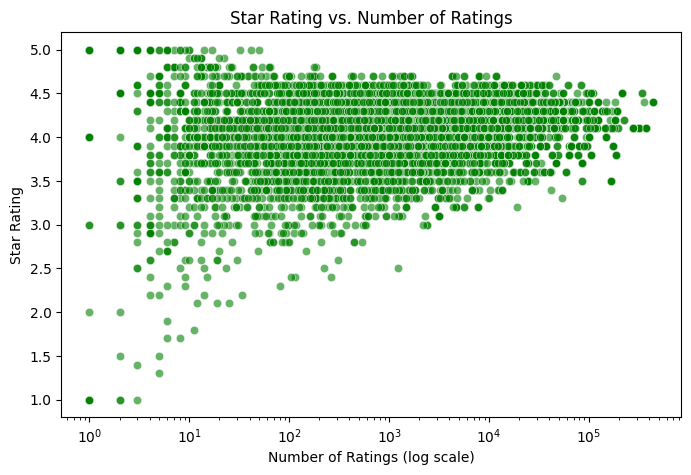

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['no_of_ratings_cleaned'], 
    y=df['ratings_cleaned'],
    alpha=0.6, 
    color='green'
)
plt.xscale('log')
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Star Rating")
plt.title("Star Rating vs. Number of Ratings")
plt.show()

In [16]:
# df.sort_values(by='no_of_ratings_cleaned',ascending=False)

In [17]:
top_10_rated = df.sort_values(by='no_of_ratings_cleaned', ascending=False).head(10)  # check the ascending order of no of ratings clened coloum 

In [18]:
top_10_rated


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,ratings_cleaned,no_of_ratings_cleaned,discount_price_cleaned,actual_price_cleaned
1217,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/AmazonBasics-High-Speed-...,4.4,"437,651",₹269,₹475,4.4,437651.0,269.0,475.0
605,Amazon Basics Flexible Premium HDMI Cable (Bla...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71gEiWJNPe...,https://www.amazon.in/AmazonBasics-Flexible-HD...,4.4,"437,651",₹269,₹700,4.4,437651.0,269.0,700.0
470,Amazon Basics High-Speed HDMI Cable - 10 Feet ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/AmazonBasics-High-Speed-...,4.4,"437,651",₹379,₹995,4.4,437651.0,379.0,995.0
2542,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61ntykhzGV...,https://www.amazon.in/AmazonBasics-High-Speed-...,4.4,"437,651",₹349,"₹1,400",4.4,437651.0,349.0,1400.0
15,boAt BassHeads 100 in-Ear Wired Headphones wit...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/719elVA3Fv...,https://www.amazon.in/boAt-BassHeads-100-Headp...,4.1,"375,110",₹399,₹999,4.1,375110.0,399.0,999.0
280,boAt Bassheads 100 Wired in Ear Earphones with...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51hf-Hst0a...,https://www.amazon.in/Bassheads-100-Wired-Earp...,4.1,"375,110",₹399,₹999,4.1,375110.0,399.0,999.0
382,boAt BassHeads 100 in-Ear Wired Headphones wit...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71e1SSUhZe...,https://www.amazon.in/boAt-BassHeads-100-Headp...,4.1,"375,110",₹399,₹999,4.1,375110.0,399.0,999.0
4365,boAt BassHeads 100 Delhi Capitals Edition Wire...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61nQVM32kr...,https://www.amazon.in/BassHeads-100-Capitals-E...,4.1,"375,110",₹474,"₹1,499",4.1,375110.0,474.0,1499.0
170,boAt Bassheads 100 in Ear Wired Earphones with...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61l+14s5QV...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,4.1,"375,110",₹399,₹999,4.1,375110.0,399.0,999.0
848,boAt Bassheads 100 Wired in Ear Earphones with...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51WGHlpa-z...,https://www.amazon.in/Bassheads-100-Wired-Earp...,4.1,"375,110",₹399,₹999,4.1,375110.0,399.0,999.0


In [19]:
display(top_10_rated[['name','no_of_ratings','ratings','discount_price','actual_price']])


,name,no_of_ratings,ratings,discount_price,actual_price
1217,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","437,651",4.4,₹269,₹475
605,Amazon Basics Flexible Premium HDMI Cable (Bla...,"437,651",4.4,₹269,₹700
470,Amazon Basics High-Speed HDMI Cable - 10 Feet ...,"437,651",4.4,₹379,₹995
2542,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","437,651",4.4,₹349,"₹1,400"
15,boAt BassHeads 100 in-Ear Wired Headphones wit...,"375,110",4.1,₹399,₹999
280,boAt Bassheads 100 Wired in Ear Earphones with...,"375,110",4.1,₹399,₹999
382,boAt BassHeads 100 in-Ear Wired Headphones wit...,"375,110",4.1,₹399,₹999
4365,boAt BassHeads 100 Delhi Capitals Edition Wire...,"375,110",4.1,₹474,"₹1,499"
170,boAt Bassheads 100 in Ear Wired Earphones with...,"375,110",4.1,₹399,₹999
848,boAt Bassheads 100 Wired in Ear Earphones with...,"375,110",4.1,₹399,₹999


In [20]:
!pip install wordcloud


In [21]:
df['name'].head(1)

0    Redmi 10 Power (Power Black, 8GB RAM, 128GB St...
Name: name, dtype: object

In [22]:
from wordcloud import WordCloud

all_names = " ".join(df['name'].astype(str).fillna(""))
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords={'with','for','and','in','to','of','the','by'}  # add any relevant stops
).generate(all_names)

# plt.figure(figsize=(10,5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title("WordCloud of Product Names")
# plt.show()

In [23]:
# wordcloud.generate(all_names)

In [24]:
# drop tha drop_unnecessary_columns form the data set 

def drop_unnecessary_columns(dataframe, drop_cols):
    """
    Removes columns that aren't needed for recommendation.
    """
    dataframe.drop(drop_cols, axis=1, inplace=True)
    return dataframe

drop_cols = ['main_category','sub_category']  
prod_df = drop_unnecessary_columns(prod_df, drop_cols)

In [25]:
prod_df.duplicated().sum()


0

In [26]:
# df.isnull().sum()


In [27]:
prod_df.isnull().sum()

name                0
image               0
link                0
ratings            95
no_of_ratings      95
discount_price    484
actual_price       70
dtype: int64

In [28]:
# drop the duplicate value from data set 

duplicates_count = prod_df.duplicated().sum()
print("Number of duplicated rows:", duplicates_count)
if duplicates_count > 0:
    prod_df.drop_duplicates(inplace=True)

Number of duplicated rows: 0


In [29]:
# drop the nall value from dataset 

prod_df.dropna(subset=['name'], inplace=True)

print("Shape after cleaning:", prod_df.shape)

Shape after cleaning: (9600, 7)


In [30]:
prod_df.dropna(subset=['ratings'],inplace=True)


In [31]:
prod_df.dropna(subset=['discount_price'],inplace=True)


In [32]:
prod_df.isnull().sum()


name              0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [33]:
prod_df

,name,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...",https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...",https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...",https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"
...,...,...,...,...,...,...,...
9595,PALAY® BTS Backpack For Boys Kpop BTS Bangtan ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PALAY%C2%AE-Backpack-Ban...,4.1,37,"₹1,710","₹2,491"
9596,MOCA iPad Air 5th Generation Case 2022 / iPad ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MOCA-Protective-Generati...,4.2,"1,133",₹475,"₹1,999"
9597,ZEBRONICS Zeb-Sound Bomb 5 TWS V5.0 Bluetooth ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Zebronics-Zeb-Sound-Blue...,3.5,"3,177",₹962,"₹3,999"
9598,LINQS® Original NXP Chip | Waterproof NFC Tag ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/LINQS-Sticker-Smartrac-C...,3.6,210,₹400,"₹1,000"


In [34]:
prod_df['search_terms'] = prod_df['name'].str.lower()
prod_df['search_terms'] = prod_df['search_terms'].str.replace(r'[^\w\d\s]+',' ', regex=True)

In [35]:
stemmer = PorterStemmer()


In [36]:
prod_df['search_terms'].head(1)

0    redmi 10 power  power black  8gb ram  128gb st...
Name: search_terms, dtype: object

In [37]:
def stemming_function(sentence):
    """
    Applies stemming on each token in the sentence.
    """
    words = sentence.split()   
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)
# stemming_function(prod_df['search_terms'])

prod_df['search_terms'] = prod_df['search_terms'].apply(stemming_function)

In [38]:
prod_df[['name','search_terms']].head(3)


,name,search_terms
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...",redmi 10 power power black 8gb ram 128gb storag
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...",oneplu nord ce 2 lite 5g blue tide 6gb ram 128...
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,oneplu bullet z2 bluetooth wireless in ear ear...


In [39]:
prod_df['search_terms'].head(1)


0    redmi 10 power power black 8gb ram 128gb storag
Name: search_terms, dtype: object

In [40]:
prod_df.shape


(9026, 8)

In [41]:
vectorizer = CountVectorizer(
    max_features=5000,  
    stop_words='english',
    dtype=np.int8
)

feature_matrix = vectorizer.fit_transform(prod_df['search_terms'])
print("Feature matrix shape:", prod_df.shape)

Feature matrix shape: (9026, 8)


In [42]:
prod_df['search_terms'].head(5)

0      redmi 10 power power black 8gb ram 128gb storag
1    oneplu nord ce 2 lite 5g blue tide 6gb ram 128...
2    oneplu bullet z2 bluetooth wireless in ear ear...
3    samsung galaxi m33 5g mystiqu green 6gb 128gb ...
4    oneplu nord ce 2 lite 5g black dusk 6gb ram 12...
Name: search_terms, dtype: object

In [43]:
similarities = cosine_similarity(feature_matrix)
print("Similarity matrix shape:", similarities.shape)

Similarity matrix shape: (9026, 9026)


In [44]:
similarities

array([[1.        , 0.27272727, 0.07106691, ..., 0.        , 0.        ,
        0.0836242 ],
       [0.27272727, 1.        , 0.07106691, ..., 0.        , 0.        ,
        0.        ],
       [0.07106691, 0.07106691, 1.        , ..., 0.18257419, 0.        ,
        0.06537205],
       ...,
       [0.        , 0.        , 0.18257419, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0836242 , 0.        , 0.06537205, ..., 0.        , 0.        ,
        1.        ]])

In [45]:
sorted(list(enumerate(similarities[0])))[0:5]


[(0, 1.0),
 (1, 0.2727272727272727),
 (2, 0.07106690545187015),
 (3, 0.26967994498529685),
 (4, 0.36363636363636365)]

In [46]:
sorted(list(enumerate(similarities[0])),key = lambda x :x[1],reverse=True)[0:5]


[(0, 1.0),
 (5, 0.8040302522073697),
 (8643, 0.5698028822981898),
 (8230, 0.533001790889026),
 (8825, 0.533001790889026)]

In [47]:
def memory_in_mb(obj):
    """
    Returns memory usage of an object in megabytes.
    """
    return sys.getsizeof(obj)/1024/1024

print(f"Size of the similarity matrix: {memory_in_mb(similarities):.2f} MB")

Size of the similarity matrix: 621.56 MB


In [48]:
def build_top_neighbors_matrix(sim_matrix, k=10):
    """
    For each product, find the top-K neighbors (most similar),
    excluding the product itself. Return a 2D list/array of indices.
    """
    top_neighbors_list = []
    
    for row_idx in range(sim_matrix.shape[0]):
        sim_scores = list(enumerate(sim_matrix[row_idx]))
        sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_neighbors = sim_scores_sorted[1:k+1]
        top_neighbors_indices = [item[0] for item in top_neighbors]
        top_neighbors_list.append(top_neighbors_indices)
    
    return np.array(top_neighbors_list, dtype=np.int32)

start_time = time.time()
top_k_neighbors = build_top_neighbors_matrix(similarities, k=10)
end_time = time.time()

print(f"Time to build top-10 neighbors structure: {end_time - start_time:.3f} sec")
print("Shape of top_k_neighbors:", top_k_neighbors.shape)
print(f"Memory usage of top_k_neighbors: {memory_in_mb(top_k_neighbors):.2f} MB")

Time to build top-10 neighbors structure: 26.986 sec
Shape of top_k_neighbors: (9026, 10)
Memory usage of top_k_neighbors: 0.34 MB


In [49]:
# del similarities

In [50]:
def shorten_image_url(url_str):
    """
    Example of how to shorten the image URL 
    if you find repeated patterns. Adjust logic as needed.
    """
    url_str = str(url_str)
    part_after = url_str.split('images/')[-1]
    part_after = part_after.split('._AC_UL320_.jpg')[0]
    return part_after

prod_df['image_id'] = prod_df['image'].apply(shorten_image_url)

In [51]:
prod_df['image_id'].head(1)

0    I/81eM15lVcJL
Name: image_id, dtype: object

In [52]:
def shorten_amazon_link(link_str):
    """
    Removes the 'https://www.amazon.in/' part 
    to keep only the path if that's desired.
    """
    link_str = str(link_str)
    return link_str.replace('https://www.amazon.in/', '')

prod_df['link_id'] = prod_df['link'].apply(shorten_amazon_link)

In [53]:
prod_df['ratings_cleaned'] = prod_df['ratings'].str.replace(r'[^\d.]','', regex=True).astype(float, errors='ignore')
prod_df['num_ratings_cleaned'] = prod_df['no_of_ratings'].str.replace(r'[^\d.]','', regex=True).astype(float, errors='ignore')

In [54]:
product_names = prod_df['name'].reset_index(drop=True)
name_to_idx_map = {name: i for i, name in enumerate(product_names)}

# name_to_idx_map
# lable encoding 

In [55]:
def find_index_by_name(product_name):
    """
    Returns the index of a product if found, else -1.
    """
    return name_to_idx_map.get(product_name, -1)

In [56]:
def find_index_by_partial_link(partial_link):
    """
    If user inputs a link or partial link, 
    find that product's index from 'link_id'.
    """
    mask = prod_df['link_id'].str.contains(partial_link, na=False)
    matches = prod_df[mask]
    if not matches.empty:
        return matches.index[0]
    return -1

In [57]:
def get_similar_products(product_query, k=5):
    """
    1) Check if product_query is a full name or partial link.
    2) Retrieve the product index.
    3) Extract top-k neighbors.
    4) Return recommended items as a DataFrame.
    """
    idx = find_index_by_name(product_query)
    
    if idx == -1:
        idx = find_index_by_partial_link(product_query)
    
    if idx == -1:
        print(f"Product '{product_query}' not found in the dataset.")
        return pd.DataFrame()
    
    neighbors_indices = top_k_neighbors[idx][:k]
    
    rec_df = prod_df.iloc[neighbors_indices].copy()
    rec_df = rec_df[['name','ratings','no_of_ratings','discount_price','actual_price','link','image']]
    rec_df.reset_index(drop=True, inplace=True)
    return rec_df


In [58]:
some_product = prod_df['name'].iloc[100]
print("::---SELECTED PRODUCT---::")
print(some_product)

print("\n::---TOP 5 RECOMMENDATIONS---::")
recommendations_df = get_similar_products(some_product, k=5)
display(recommendations_df)

::---SELECTED PRODUCT---::
boAt Airdopes 172 True Wireless in Ear Earbuds with ENx™ Tech, Beast Mode, 35H Playtime, 11mm Drivers, ASAP™ Charge, IPX4,...

::---TOP 5 RECOMMENDATIONS---::


,name,ratings,no_of_ratings,discount_price,actual_price,link,image
0,boAt Airdopes 172 True Wireless in Ear Earbuds...,3.8,"48,615","₹1,199","₹2,990",https://www.amazon.in/boAt-Airdopes-172-Wirele...,https://m.media-amazon.com/images/I/51Cr2ebLj9...
1,boAt Airdopes 113 TWS Wireless in Ear Earbuds ...,4.3,134,"₹1,299","₹2,990",https://www.amazon.in/boAt-Airdopes-113-Immers...,https://m.media-amazon.com/images/I/412EM++qEC...
2,boAt Airdopes 113 TWS Wireless in Ear Earbuds ...,4.3,134,"₹1,299","₹2,990",https://www.amazon.in/boAt-Airdopes-113-Immers...,https://m.media-amazon.com/images/I/518TpkNStF...
3,boAt Airdopes 141 Pro True Wireless in Ear Ear...,3.9,"172,347","₹1,399","₹2,990",https://www.amazon.in/boAt-Airdopes-141-Pro-Wi...,https://m.media-amazon.com/images/I/41TWloBD6X...
4,boAt Airdopes 113 Bluetooth Truly Wireless in ...,4.3,134,"₹1,299","₹2,990",https://www.amazon.in/boAt-Airdopes-113-Blueto...,https://m.media-amazon.com/images/I/51qs4eM3lJ...


In [65]:
prod_df.head()

import joblib
joblib.dump(prod_df,"prod_df.lb")

['prod_df.lb']

In [60]:
from IPython.display import HTML, display

In [61]:
some_product = "Dell MS116 1000Dpi USB Wired Optical Mouse, Led Tracking, Scrolling Wheel, Plug and Play."
recommendations_df = get_similar_products(some_product, k=5)
selected_idx = find_index_by_name(some_product)
selected_row = prod_df.iloc[selected_idx]
selected_name = selected_row['name']
selected_price = selected_row['discount_price']
selected_image_url = selected_row['image'] 
display(HTML(f"""
<h2>Selected Product</h2>
<div style="display: flex; align-items: center; margin-bottom: 20px;">
  <img src="{selected_image_url}" alt="Product Image" 
       style="width: 120px; margin-right: 20px; border: 1px solid #ccc;"/>
  <div>
    <h4 style="margin: 0;">{selected_name}</h4>
    <p style="margin: 5px 0;">Price: {selected_price}</p>
  </div>
</div>
"""))
display(HTML("<h3>Top 5 Recommendations</h3>"))
for _, row in recommendations_df.iterrows():
    rec_name  = row['name']
    rec_price = row['discount_price']
    rec_image = row['image']
    
    display(HTML(f"""
    <div style="border: 1px solid #ddd; margin-bottom: 15px; padding: 10px; 
                display: flex; align-items: center;">
      <img src="{rec_image}" alt="Recommended Product" 
           style="width: 80px; margin-right: 20px; border: 1px solid #ccc;"/>
      <div>
        <p style="margin: 0;"><strong>{rec_name}</strong></p>
        <p style="margin: 5px 0;">Price: {rec_price}</p>
      </div>
    </div>
    """))

In [62]:
some_product = "OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, 128GB Storage)"
recommendations_df = get_similar_products(some_product, k=5)
selected_idx = find_index_by_name(some_product)
selected_row = prod_df.iloc[selected_idx]
selected_name = selected_row['name']
selected_price = selected_row['discount_price']
selected_image_url = selected_row['image'] 
display(HTML(f"""
<h2>Selected Product</h2>
<div style="display: flex; align-items: center; margin-bottom: 20px;">
  <img src="{selected_image_url}" alt="Product Image" 
       style="width: 120px; margin-right: 20px; border: 1px solid #ccc;"/>
  <div>
    <h4 style="margin: 0;">{selected_name}</h4>
    <p style="margin: 5px 0;">Price: {selected_price}</p>
  </div>
</div>
"""))
display(HTML("<h3>Top 5 Recommendations</h3>"))
for _, row in recommendations_df.iterrows():
    rec_name  = row['name']
    rec_price = row['discount_price']
    rec_image = row['image']
    
    display(HTML(f"""
    <div style="border: 1px solid #ddd; margin-bottom: 15px; padding: 10px; 
                display: flex; align-items: center;">
      <img src="{rec_image}" alt="Recommended Product" 
           style="width: 80px; margin-right: 20px; border: 1px solid #ccc;"/>
      <div>
        <p style="margin: 0;"><strong>{rec_name}</strong></p>
        <p style="margin: 5px 0;">Price: {rec_price}</p>
      </div>
    </div>
    """))

In [63]:
# import numpy as np
# import pandas as pd
# import sys
# import re
# import time
# import pickle
# import os

# import nltk
# from nltk.stem.porter import PorterStemmer
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity